**Correlacioness variables Perros usuarios**

Este Jupyter Notebook lee las bases de datos de perros y usuarios de una fundación de perros. Las bases de datos se encuentran en formato CSV y contienen información sobre las características de los perros y los usuarios.

El Jupyter Notebook se utiliza para estandarizar la información de las bases de datos y obtener las correlaciones de las diferentes variables de cada una de ellas.

El Jupyter Notebook se divide en dos secciones principales:

* **Estandarización de la información**
* **Obtención de correlaciones**

En la sección de estandarización de la información, se definen funciones para estandarizar las variables de las bases de datos. Esto se hace para que las variables queden de tipo nominal para que las correlaciones sean más fáciles de interpretar.

En la sección de obtención de correlaciones, se utiliza la función nominal.associations de la libreria dython para obtener las correlaciones de las diferentes variables de las bases de datos. Las correlaciones se muestran en forma de una matriz de correlación.

**Resultados**

La edad y la actividad física con un valor de 0.50 que presenta una correlación moderada dado el indicador de Cramer, la cual tiene sentido ya que entre más viejo un perro, menor será su actividad necesaria en su vida diaria; igualmente, la agresividad de un perro y la relación que tiene con otros perros tiene un valor de 0.48, en su correlación debido a que si el perro presenta una agresividad alta es muy probable que no se pueda relacionar con otros perros

La correlación entre "caos" y "desorden" es de 0.37. Esta correlación sugiere que las personas que muestran un alto grado de disciplina tienden a preferir mantener el orden en su entorno y disfrutan planificar actividades al aire libre como asistir a ciclovía. Por otro lado, aquellas personas que no se ven afectadas por el caos en sus vidas pueden sentirse más identificadas con la idea de un entorno menos organizado o desordenado.
En cuanto a la relación entre la "modalidad de trabajo" y "silencio", se encuentra una correlación de 0.31. Esto indica que las personas que trabajan en entornos de trabajo presenciales tienen una inclinación hacia el ambiente tranquilo y apacible.


**Conclusiones**

Este Jupyter Notebook proporciona una forma sencilla de estandarizar la información de las bases de datos de perros y usuarios y obtener las correlaciones de las diferentes variables de cada una de ellas. Estas correlaciones pueden ser útiles para la fundación de perros para identificar a los usuarios y perros que son más compatibles entre sí.

In [1]:
#importamos librerías
import pandas as pd
import sys
sys.path.append('../../src/')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Leemos la informacion

In [2]:
data = pd.read_csv('../../Datasets/RDB.csv', delimiter=",", encoding="utf-8")
data

,perroid,Nombre,Edad,Raza,Tamano,Sexo,Color,Pelaje,Agresividad,Fundacion,atencionesEspeciales,Necesidades,ninos,entrenado,esterilizado,perros,actividad,cluster
0,1,Naranjo,2.0,criollo,intermedio,macho,mixto,corto,bajo,Peluditos con futuro,0,No presenta,1,1,1,1,1,1
1,2,Tomasa,11.0,criollo,grande,hembra,cafe,corto,bajo,Peluditos con futuro,0,No presenta,1,0,1,1,0,2
2,3,Oliver,2.0,schnauzer,pequeno,macho,gris,corto,bajo,Peluditos con futuro,0,No presenta,0,1,0,1,1,1
3,4,Guajo,7.0,criollo,intermedio,macho,mixto,corto,bajo,Peluditos con futuro,0,No presenta,1,1,1,1,0,2
4,5,Mara,9.0,pitbull,mediano,hembra,cafe,corto,bajo,Peluditos con futuro,1,Fue de pelea/ Cuidar la piel,1,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,Regalo,11.0,criollo,mediano,macho,mixto,corto,bajo,Proteccion animal,1,No le gustan las caricias prolongadas/ Enferme...,1,1,1,0,0,2
481,482,Margarita,2.0,pitbull,intermedio,hembra,blanco,corto,bajo,Proteccion animal,0,No presenta,0,0,1,0,1,3
482,483,Zeus penuela,8.0,labrador,grande,macho,negro,largo,bajo,Proteccion animal,1,Enfermedad articular,0,1,1,0,0,2
483,484,Benjamin,7.0,rottweiler,grande,macho,negro,corto,medio,Proteccion animal,1,Enfermedad articular,0,1,1,0,0,3


In [4]:
data['Edad'] = pd.to_numeric(data['Edad'], errors='coerce')
data['Raza'] = data['Raza'].str.lower()
data.loc[data['Raza'] == "criollo ", "Raza"] = 'criollo'
data['Tamano'] = data['Tamano'].str.lower()
data.loc[data['Tamano'] == "cafe", "Tamano"] = 'mediano'
data['Sexo'] = data['Sexo'].str.lower()
data['Color'] = data['Color'].str.lower()
data['Pelaje'] = data['Pelaje'].str.lower()
data.loc[data['Pelaje'] == "corto largo", "Pelaje"] = 'largo'
data['Agresividad'] = data['Agresividad'].str.lower()
data.nunique()


perroid                 485
Nombre                  300
Edad                     29
Raza                     27
Tamano                    4
Sexo                      2
Color                     9
Pelaje                    2
Agresividad               3
Fundacion                 7
atencionesEspeciales      2
Necesidades              56
ninos                     2
entrenado                 2
esterilizado              2
perros                    2
actividad                 2
cluster                   3
dtype: int64

In [6]:
dataCopy3 = data.drop(['Nombre', 'Raza', 'Necesidades', 'cluster'], axis=1)
dataCopy3['atencionesEspeciales'] = dataCopy3['atencionesEspeciales'].apply(lambda x: "si" if x == 1 else "no")
dataCopy3['ninos'] = dataCopy3['ninos'].apply(lambda x: "si" if x == 1 else "no")
dataCopy3['entrenado'] = dataCopy3['entrenado'].apply(lambda x: "si" if x == 1 else "no")
dataCopy3['esterilizado'] = dataCopy3['esterilizado'].apply(lambda x: "si" if x == 1 else "no")
dataCopy3['perros'] = dataCopy3['perros'].apply(lambda x: "si" if x == 1 else "no")
dataCopy3['actividad'] = dataCopy3['actividad'].apply(lambda x: "si" if x == 1 else "no")

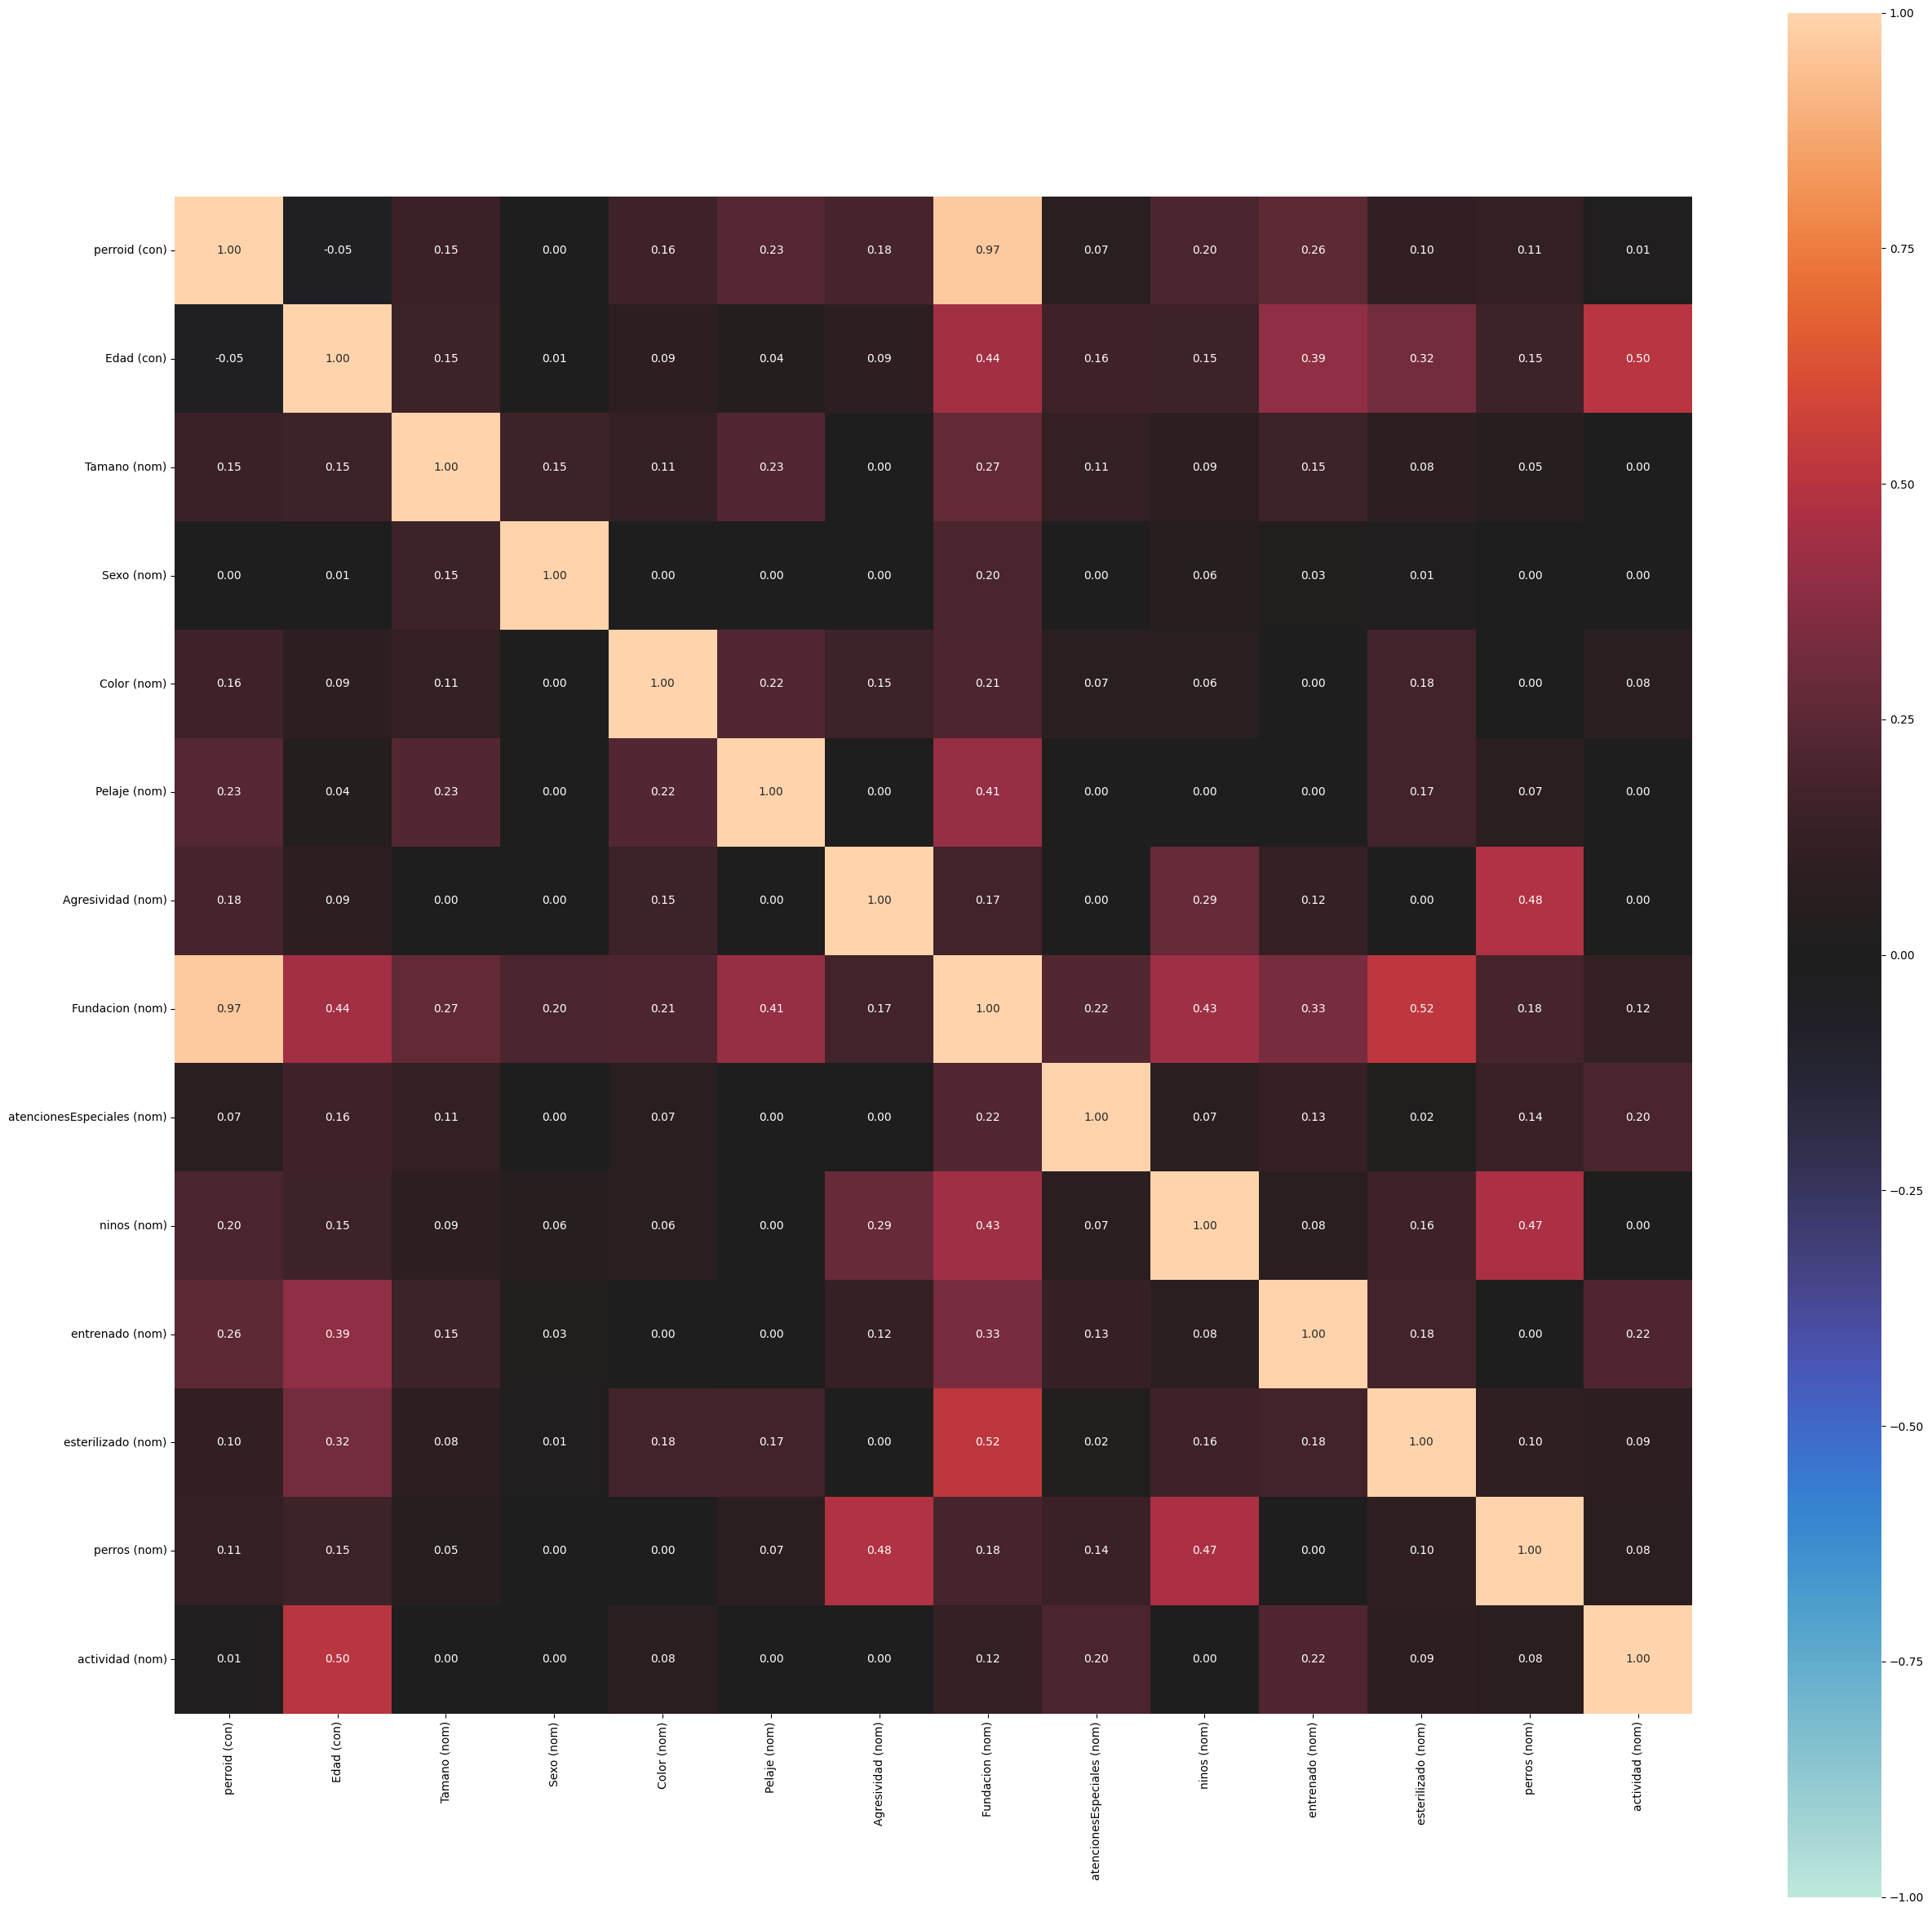

In [7]:
from dython import nominal
dataExcluded = dataCopy3.copy()
nominal_columns = ['Tamano', 'Sexo', 'Color', 'Pelaje', 'Agresividad', 'Fundacion',
       'atencionesEspeciales', 'ninos', 'entrenado', 'esterilizado', 'perros',
       'actividad']
numerical_columns =['Edad']
#dataExcluded = dataExcluded.drop(['Id', 'Nombre'], axis=1)
nominal.associations(dataExcluded,figsize=(30,30),mark_columns=True, nom_nom_assoc='cramer');

In [20]:
users = pd.read_csv('../../Datasets/users.csv', delimiter=";", encoding="utf-8")

In [21]:
users = users.drop(['0'], axis=1)
users['amigos'] = users['amigos'].apply(lambda x: "si" if x == 1 else "no")
users['familia'] = users['familia'].apply(lambda x: "si" if x == 1 else "no")
users['viajes'] = users['viajes'].apply(lambda x: "si" if x == 1 else "no")
users['paseos'] = users['paseos'].apply(lambda x: "si" if x == 1 else "no")
users['ciclovia'] = users['ciclovia'].apply(lambda x: "si" if x == 1 else "no")
users['locha'] = users['locha'].apply(lambda x: "si" if x == 1 else "no")
users['caos'] = users['caos'].apply(lambda x: "si" if x == 1 else "no")
users['disciplina'] = users['disciplina'].apply(lambda x: "si" if x == 1 else "no")
users['ruido'] = users['ruido'].apply(lambda x: "si" if x == 1 else "no")
users['silencio'] = users['silencio'].apply(lambda x: "si" if x == 1 else "no")
users['limpio'] = users['limpio'].apply(lambda x: "si" if x == 1 else "no")
users['desorden'] = users['desorden'].apply(lambda x: "si" if x == 1 else "no")
users['presencial'] = users['presencial'].apply(lambda x: "si" if x == 1 else "no")
users['virtual'] = users['virtual'].apply(lambda x: "si" if x == 1 else "no")

In [22]:
def getEstrat(estrato):
    match estrato:
        case 0:
            return "estrato 1"
        case 1:
            return "estrato 2"
        case 2:
            return "estrato 3"
        case 4:
            return "estrato 4"
        case 5:
            return "estrato 5"
        case 6:
            return "estrato 6"
def getSalario(salario):
    match salario:
        case 0:
            return "salario 0"
        case 1:
            return "salario 1"
        case 2:
            return "salario 2"
def getModalidad(modalidad):
    match modalidad:
        case "si":
            return "presencial"
        case "no":
            return "virtual"



In [23]:
users['estrato'] = users['F'].apply(lambda x: getEstrat(x))
users['salario'] = users['G'].apply(lambda x: getSalario(x))
users['modalidad'] = users['presencial'].apply(lambda x: getModalidad(x))


In [24]:
users.head(1)

,id,A,B,C,D,E,F,G,amigos,familia,...,disciplina,ruido,silencio,limpio,desorden,presencial,virtual,estrato,salario,modalidad
0,1,familia sin hijos,Quedarme en casa,actividades al en la casa,Las cosas tienen libertad de escoger,Casa,1,1,no,si,...,no,no,no,no,si,no,si,estrato 2,salario 1,virtual


In [25]:
users = users.drop(['id', 'F', 'G', 'estrato', 'salario', 'presencial', 'virtual'] , axis=1)
nominal.associations(users,figsize=(30,30),mark_columns=True, nom_nom_assoc='cramer');

correlaciones altas:
caos y desorden 
limpio y disciplina
caos - D
disciplina - D
estrato - salario 
Cramer's V Coefficient (V)


It is interpreted as a measure of the relative (strength) of an association between two variables. The coefficient ranges from 0 to 1 (perfect association). In practice, you may find that a Cramer's V of .10 provides a good minimum threshold for suggesting there is a substantive relationship between two variables. 
#### https://www.acastat.com/statbook/chisqassoc.htm#:~:text=between%20the%20variables.-,It%20is%20interpreted%20as%20a%20measure%20of%20the%20relative%20(strength,substantive%20relationship%20between%20two%20variables.